# Pure numpy implementation of Linear and Polynomial Regressions

---

Implementation with numpy only (without sklearn),<br>
computing the cost function and performing gradient descent in pure numpy in vectorized form.<br>
Solving both linear and polynomial regressions using linear algebra.<br>
Finding the optimal hyperparameters alpha and decay factor (using adaptive learning rates).

---

Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## About the Dataset

We will use a dataset containing housing prices in King County, USA.<br>
The dataset contains 5,000 observations with 18 features and a single target value - the house price.

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5000.0,4.630823e+09,2.870890e+09,1.000102e+06,2.154075e+09,4.022900e+09,7.345078e+09,9.842300e+09
price,5000.0,5.394699e+05,3.873115e+05,7.500000e+04,3.179062e+05,4.490000e+05,6.500000e+05,7.060000e+06
bedrooms,5000.0,3.371400e+00,9.103998e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
bathrooms,5000.0,2.062150e+00,7.735920e-01,0.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,6.750000e+00
sqft_living,5000.0,2.061037e+03,9.237275e+02,3.800000e+02,1.410000e+03,1.890000e+03,2.500000e+03,1.004000e+04
sqft_lot,5000.0,1.615893e+04,4.600220e+04,6.090000e+02,5.400000e+03,7.875000e+03,1.123400e+04,1.651359e+06
floors,5000.0,1.432600e+00,5.107929e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,5000.0,9.400000e-03,9.650649e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,5000.0,2.430000e-01,7.746425e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,5000.0,3.455000e+00,6.776923e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset.

---

In [5]:
X = df['sqft_living'].values
y = df['price'].values

### Normalizing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Using [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

In [6]:
def normalization(X, y):
    """
    
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    
    """
    
    X = (X - X.mean(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    y = (y - y.mean()) / (y.max() - y.min())
    
    return X, y

In [7]:
X, y = normalization(X, y)

We will split the data into two datasets (without sklearn's train_test_split): 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)

indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]

X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

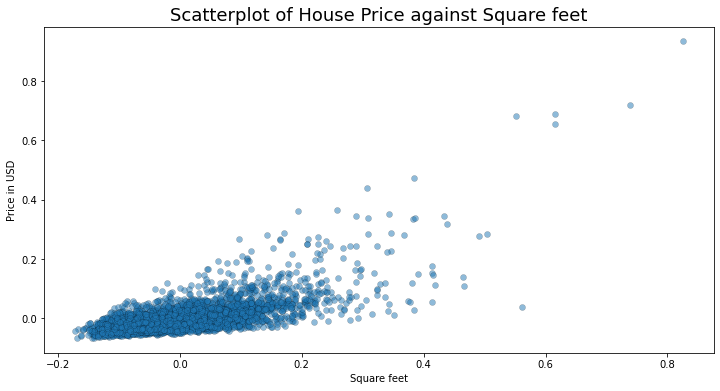

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(X_train, y_train, edgecolor='k', lw=0.25, alpha=0.5)
ax.set_title('Scatterplot of House Price against Square feet', fontsize=18)
ax.set_xlabel('Square feet'), ax.set_ylabel('Price in USD');

### Bias Trick

`X` takes into consideration the bias $\theta_0$ in the linear model. Recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Adding columns of ones as the zeroth column of the features (for both the training and validation sets).

In [10]:
def add_bias(X):
    
    return np.column_stack([np.ones(X.shape[0]), X])


X_train = add_bias(X_train)
X_val = add_bias(X_val)

### Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

### Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

### Implementing the cost function `compute_cost`.

In [11]:
def compute_cost(X, y, theta):
    """
    
    Computes the average squared difference between an observation's actual and
    predicted values for linear regression.

    Input:
    - X: inputs (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    
    """
    
    J = 0  # Use J for the cost.
    
    m = X.shape[0]
    y_pred = X @ theta
    
    J = (1 / (2*m)) * np.sum(np.square(y_pred - y))

    return J

In [12]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

### Implementing the gradient descent function `gradient_descent`.

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    
    """
    
    J_history = []
    theta = theta.copy() # avoid changing the original thetas
    
    m = X.shape[0]
    
    for _ in range(num_iters):
        
        y_pred = X @ theta
        theta -= ((alpha * (1/m)) * (X.T @ (y_pred - y)))
        
        J = compute_cost(X, y, theta)
        J_history.append(J)
    
    return theta, J_history

In [14]:
np.random.seed(42)

theta = np.random.random(size=X_train.shape[1])
iterations = 40_000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

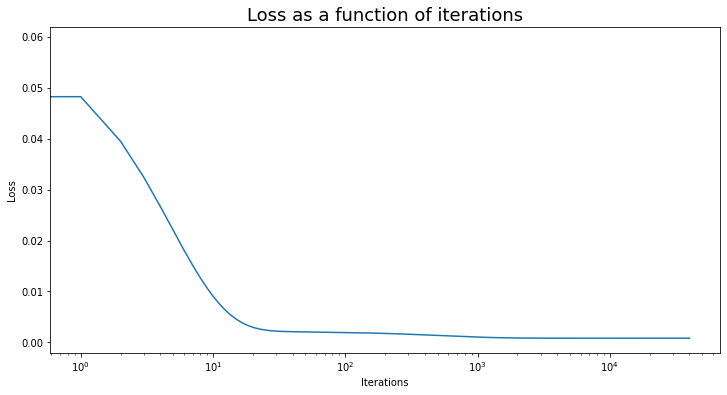

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.arange(iterations), J_history)

ax.set_title('Loss as a function of iterations', fontsize=18)
ax.set_xlabel('Iterations'), ax.set_ylabel('Loss')
ax.set_xscale('log');

### Implementing the pseudo-inverse function `pinv` without using `np.linalg.pinv`.
Which is an approximated approach to calculate the thetas.

In [16]:
def pinv(X, y):
    """
    
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    """
    
    pinv_theta = (np.linalg.inv(X.T @ X) @ X.T) @ y  # Similar to np.linalg.pinv(X) @ y
    
    return pinv_theta

In [17]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

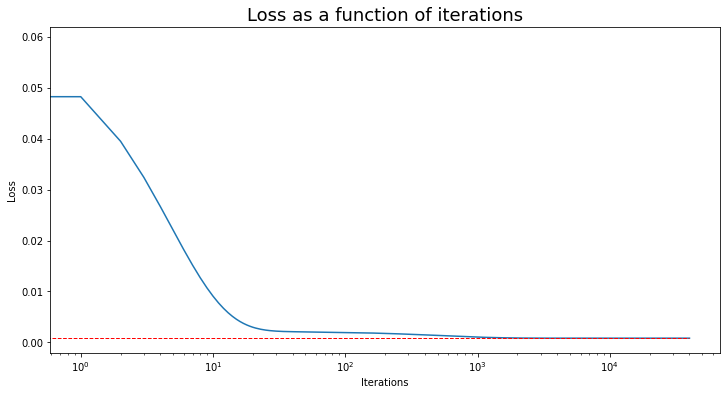

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.arange(iterations), J_history)
ax.hlines(xmin=0, xmax=len(J_history), y=J_pinv, color='r', linewidth=1, linestyle='dashed')

ax.set_title('Loss as a function of iterations', fontsize=18)
ax.set_xlabel('Iterations'), ax.set_ylabel('Loss')
ax.set_xscale('log');

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next.

In [19]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    
    """
    
    J_history = [np.inf]
    theta = theta.copy() # avoid changing the original thetas
    
    m = X.shape[0]
    
    for _ in range(num_iters):
            
        y_pred = X @ theta
        theta = theta - ((alpha * (1/m)) * (X.T @ (y_pred - y)))
        
        J = compute_cost(X, y, theta)
        J_history.append(J)
        
        if J_history[-1] - J_history[-2] < 1e-8:
            break
        
    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. We can use the function `find_best_alpha`, using training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [20]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    
    init_theta = np.random.random(size=X_train.shape[1])
    
    for alpha in alphas:
        theta, J_history = efficient_gradient_descent(X_train, y_train, init_theta, alpha, iterations)
        validation_loss = compute_cost(X_val, y_val, theta)
        alpha_dict[alpha] = validation_loss
        
    return alpha_dict

In [21]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40_000)

Obtain the best learning rate from the dictionary `alpha_dict`.

In [22]:
best_alpha = min(alpha_dict, key=alpha_dict.get)
best_alpha

1

### Plotting the top alphas convergence

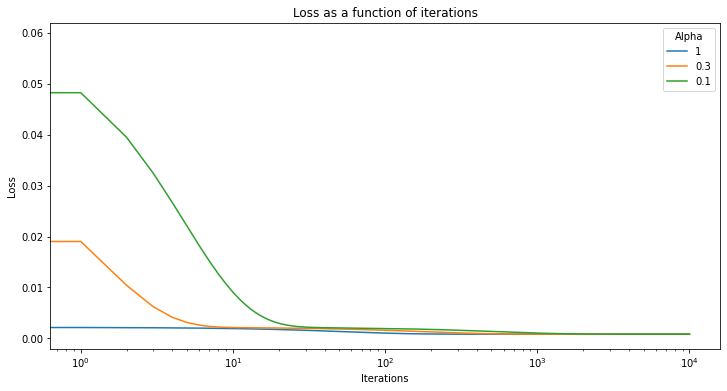

In [23]:
np.random.seed(42)

def plot_best_alphas(X_train, y_train, top_alphas, iterations):    
    
    theta = np.random.random(size=X_train.shape[1])

    fig, ax = plt.subplots(figsize=(12,6))

    for alpha in top_alphas:

        _, J_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

        ax.plot(np.arange(iterations), J_history, label=alpha)

    ax.legend(title='Alpha')
    ax.set_xscale('log')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Loss as a function of iterations');


top_alphas = sorted(alpha_dict, key=alpha_dict.get)[:3]
plot_best_alphas(X_train, y_train, top_alphas, iterations=10_000)

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

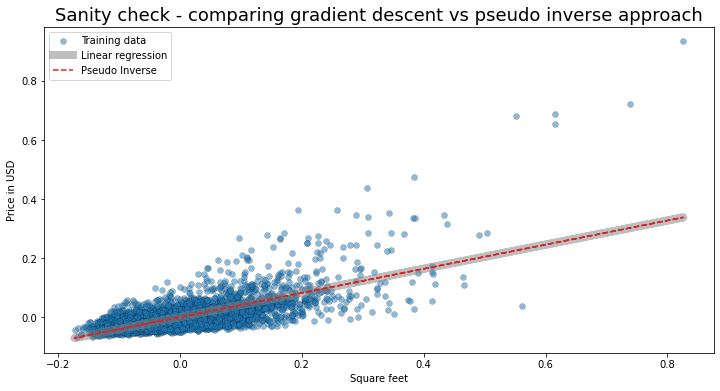

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(X_train[:, 1], y_train, edgecolor='k', lw=0.25, alpha=0.5)

ax.plot(X_train[:, 1], X_train @ theta, color='tab:grey', ls='-', lw=8, alpha=0.5)
ax.plot(X_train[:, 1], X_train @ theta_pinv, color='tab:red', ls='--')

ax.set_title('Sanity check - comparing gradient descent vs pseudo inverse approach', fontsize=18)
ax.set_xlabel('Square feet'), ax.set_ylabel('Price in USD')

ax.legend(['Training data', 'Linear regression', 'Pseudo Inverse']);

---

## Multivariate Linear Regression

The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

---

In [25]:
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

In [27]:
X, y = normalization(X, y)

In [28]:
np.random.seed(42)

indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]

X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

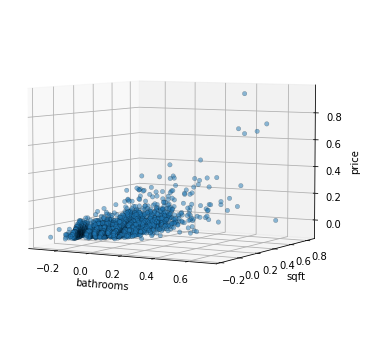

In [29]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

xx = X_train[:, 1]
yy = X_train[:, 2]
zz = y_train

ax.scatter(xx, yy, zz, marker='o', edgecolor='k', lw=0.25, alpha=0.5)
ax.set_xlabel('bathrooms'), ax.set_ylabel('sqft'), ax.set_zlabel('price')

ax.view_init(5);

In [30]:
X_train = add_bias(X_train)
X_val = add_bias(X_val)

In [31]:
np.random.seed(42)

shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40_000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [32]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

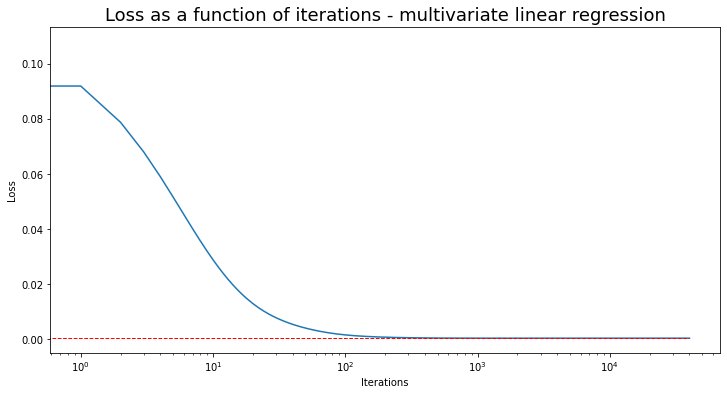

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.arange(iterations), J_history)
ax.hlines(xmin=0, xmax=len(J_history), y=J_pinv, color='r', linewidth=1, linestyle='dashed')

ax.set_title('Loss as a function of iterations - multivariate linear regression', fontsize=18)
ax.set_xlabel('Iterations'), ax.set_ylabel('Loss')
ax.set_xscale('log');

---

## Polynomial Regression

Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

As required. 

For this exercise, use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

and evaluate the MSE cost on the training and testing datasets.

In [34]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)

In [35]:
all_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
mse_linear_model = compute_cost(X_val, y_val, theta)

In [37]:
n_features = X.shape[1]
poly_features = np.column_stack([np.ones(X.shape[0]), X])

for col_i in range(n_features):
    for col_j in range(col_i, n_features):
        poly_features = np.column_stack([poly_features, X[:, col_i] * X[:, col_j]])

In [38]:
np.random.seed(42)

indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]

X_train, X_val = poly_features[idx_train,:], poly_features[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [39]:
np.random.seed(42)

shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40_000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

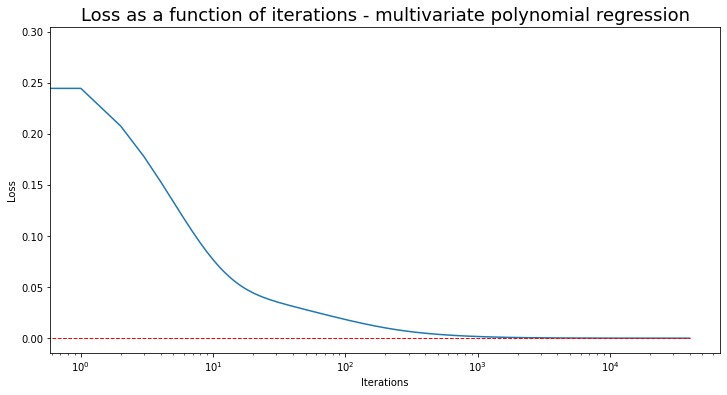

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(np.arange(iterations), J_history)
ax.hlines(xmin=0, xmax=len(J_history), y=J_pinv, color='r', linewidth=1, linestyle='dashed')

ax.set_title('Loss as a function of iterations - multivariate polynomial regression', fontsize=18)
ax.set_xlabel('Iterations'), ax.set_ylabel('Loss')
ax.set_xscale('log');

In [41]:
mse_polynomial_model = compute_cost(X_val, y_val, theta)

# Similar to:
# y_pred = (X_val @ theta)
# errors = y_pred - y_val
# mse = np.mean(np.square(errors))

In [42]:
print('MSE of the linear model:', mse_linear_model)
print('MSE of the polynomial model:', mse_polynomial_model)

MSE of the linear model: 0.00042380404332184666
MSE of the polynomial model: 0.00030407996222334155


We can see some improvement between the linear model and the polynomial model. <br>
It is related to the fact that some features have non-linear relationship which can add additional information for our model. <br>
The polynomial model explains the relationship between the independent and dependent variables (Xs to y) better.

---

## Adaptive Learning Rate

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Implement the adaptive learning rate method based on the gradient descent algorithm above. 

**Finding proper hyper-parameter values for the adaptive technique and comparing this technique to the constant learning rate**. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

In [43]:
def adaptive_gradient_descent(X, y, theta, alpha, decay_factor, num_iters):
    """
    
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    
    """
    
    J_history = []
    theta = theta.copy() # avoid changing the original thetas
    
    m = X.shape[0]
    
    for t in range(num_iters):
        y_pred = X @ theta
        
        theta = theta - ((alpha * (1/m)) * (X.T @ (y_pred - y)))
        
        J = compute_cost(X, y, theta)
        J_history.append(J)
        
        alpha = alpha / (1 + decay_factor * t)
    
    return theta, J_history

In [44]:
def find_best_decay_factor(X_train, y_train, X_val, y_val, iterations):
    """
    
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    
    """
    
    decays = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    decays_dict = {}
    
    init_theta = np.random.random(size=X_train.shape[1])
    
    for decay_factor in decays:
        theta, J_history = adaptive_gradient_descent(X_train, y_train, init_theta, alpha=1, decay_factor=decay_factor, num_iters=iterations)
        validation_loss = compute_cost(X_val, y_val, theta)
        decays_dict[decay_factor] = validation_loss
        
    return alpha_dict

In [45]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

In [46]:
X, y = normalization(X, y)

In [47]:
np.random.seed(42)

indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]

X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

In [48]:
X_train = add_bias(X_train)
X_val = add_bias(X_val)

In [49]:
decays_dict = find_best_decay_factor(X_train, y_train, X_val, y_val, 10_000)

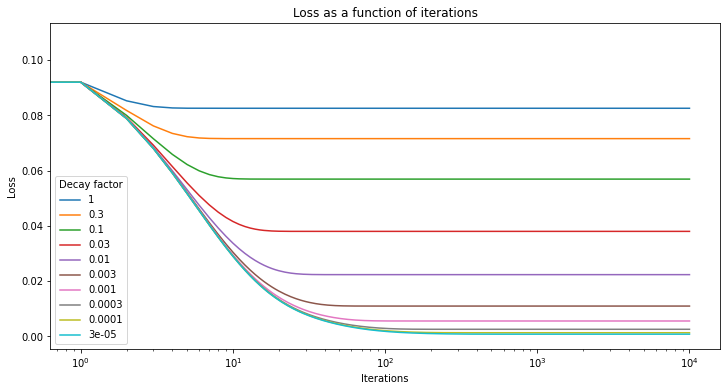

In [51]:
np.random.seed(42)

def plot_best_decays(X_train, y_train, top_decays, iterations):    
    
    theta = np.random.random(size=X_train.shape[1])

    fig, ax = plt.subplots(figsize=(12,6))

    for decay_factor in top_decays:

        _, J_history = adaptive_gradient_descent(X_train, y_train, theta, alpha=1, decay_factor=decay_factor, num_iters=iterations)

        ax.plot(np.arange(iterations), J_history, label=decay_factor)

    ax.legend(title='Decay factor')
    ax.set_xscale('log')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss')
    ax.set_title('Loss as a function of iterations');


top_decays = sorted(decays_dict, key=decays_dict.get)[:10]
plot_best_decays(X_train, y_train, top_decays, iterations=10_000)

---